In [82]:
class NODES:
    
    N: int
    dx: float
    iters: int
    state: dict = {"euler": {}, "rk2": {}, "rk3": {}, "rk4":{}}
    evolvers: dict = {}
    state_history: dict = {"euler": {}, "rk2": {}, "rk3": {}, "rk4":{}}
    analytical = []
    
    def __init__(self, N, dx, iters, state, evolvers):

        self.N = N
        self.dx = dx
        self.iters = iters

        for method in self.state:
            self.state[method] = state
            
        self.evolvers = evolvers

        for method in self.state_history:
            self.state_history[method]["x"] = []
            for i in range(0, self.N):
                self.state_history[method][f"y{i}"] = []

        for i in range(0, self.iters):
            for method in self.state_history:
                for yn in method:
                    self.state_history[method][yn].append(self.state[method][yn])
            #self.analyticalf(lambda x: x**2)
            self.state["rk4"] = self.rk4(self.state["rk4"])
            self.state["euler"] = self.euler(self.state["euler"])
            
    def rk4(self, state):

        _temp = {}
        G1 = {}
        G2 = {}
        G3 = {}
        G4 = {}
        Gs = [G1, G2, G3, G4]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k != "x"}
            else:
                Gsw = 0.5
                if idx == 4: Gsw = 1
                _temp = {k:v + (self.dx)*Gsw*Gs[idx - 1][k] for k,v in state.items() if k != "x"}
            _temp["x"] = self.state["x"] + Gsw*self.dx

            for yn in _temp:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
        
        for yn in self.state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 2*Gs[1][yn] + 2*Gs[2][yn] + Gs[3][yn])

        return state

    def euler(self):
        for yn in self.state_e:
                exec(f"{yn}={self.state_e[yn]}")
        for yn in self.state_e:
            if yn == "x":
                self.state_e[yn] += self.dx
            else:
                self.state_e[yn] += eval(self.evolvers[yn])*self.dx

    #def analyticalf(self, af: callable):
     #   self.analytical.append(af(self.state["x"]))
    
        

In [83]:
import matplotlib.pyplot as plt

nodes = NODES(2, 0.1, 30, {"x":0, "y0":0, "y1":1}, {"y0":"y1", "y1":"(2*y0/x)-x*y1"})

plt.plot(nodes.state_history["euler"]["x"], nodes.state_history["euler"]["y0"], label="euler")
plt.legend()
plt.show()

KeyError: 'e'

In [ ]:
# WORKING

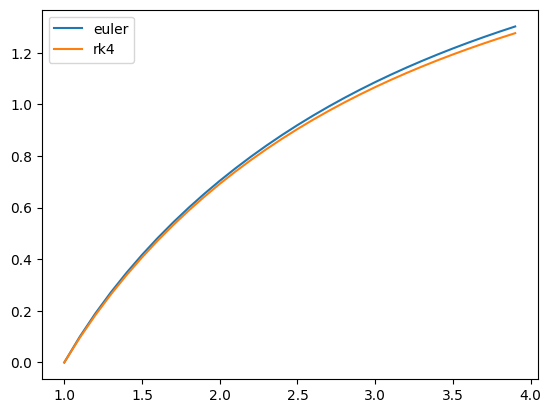

In [4]:
class NODES:
    
    N: int
    dx: float
    iters: int
    state: dict = {"euler": {}, "rk2": {}, "rk3": {}, "rk4":{}}
    evolvers: dict = {}
    state_history: dict = {"euler": {}, "rk2": {}, "rk3": {}, "rk4":{}}
    errors = {"euler": [], "rk2": [], "rk3": [], "rk4":[]}
    
    def __init__(self, N, dx, iters, state, evolvers):

        self.N = N
        self.dx = dx
        self.iters = iters

        for method in self.state:
            self.state[method] = state
            
        self.evolvers = evolvers

        for method in self.state_history:
            self.state_history[method]["x"] = []
            for i in range(0, self.N):
                self.state_history[method][f"y{i}"] = []

        for i in range(0, self.iters):
            for method in self.state_history:
                for yn in self.state_history[method]:
                    self.state_history[method][yn].append(self.state[method][yn])
            self.finderror(lambda x: x**2)
            self.state["rk4"] = self.rk4(self.state["rk4"].copy())
            self.state["euler"] = self.euler(self.state["euler"].copy())
            
    def rk4(self, state):

        _temp = {}
        G1 = {}
        G2 = {}
        G3 = {}
        G4 = {}
        Gs = [G1, G2, G3, G4]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k != "x"}
            else:
                Gsw = 0.5
                if idx == 4: Gsw = 1
                _temp = {k:v + (self.dx)*Gsw*Gs[idx - 1][k] for k,v in state.items() if k != "x"}
            _temp["x"] = state["x"] + Gsw*self.dx

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
        
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 2*Gs[1][yn] + 2*Gs[2][yn] + Gs[3][yn])

        return state

    def euler(self, state):
        for yn in state:
                exec(f"{yn}={state[yn]}")
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += eval(self.evolvers[yn])*self.dx
        return state

    def finderror(self, af: callable):
        for method in self.errors:
            self.errors[method].append(af(self.state[method]["x"]))
            
        
    
import matplotlib.pyplot as plt

nodes = NODES(2, 0.1, 30, {"x":1, "y0":0, "y1":1}, {"y0":"y1", "y1":"(2*y0/x)-x*y1"})

plt.plot(nodes.state_history["euler"]["x"], nodes.state_history["euler"]["y0"], label="euler")
plt.plot(nodes.state_history["rk4"]["x"], nodes.state_history["rk4"]["y0"], label="rk4")
# plt.plot(nodes.state_history["rk4"]["x"], nodes.errors["rk4"], label="error")

plt.legend()
plt.show()

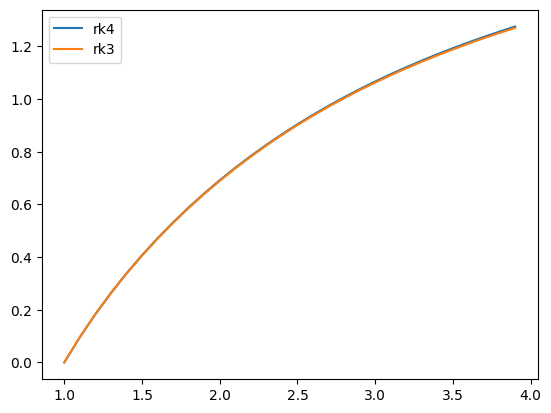

In [2]:
class NODES:
    N: int
    dx: float
    iters: int
    state: dict = {"euler":{}, "rk2":{}, "rk3":{}, "rk4":{}}
    evolvers: dict = {}
    state_history: dict = {"euler":{}, "rk2":{}, "rk3":{}, "rk4":{}}
    errors = {"euler":[], "rk2":[], "rk3":[], "rk4":[]}
    actual = []
    
    def __init__(self, N, dx, iters, state, evolvers):
        self.N = N
        self.dx = dx
        self.iters = iters

        for method in self.state:
            self.state[method] = state

        self.evolvers = evolvers

        for method in self.state_history:
            self.state_history[method]["x"] = []
            for i in range(0, self.N):
                self.state_history[method][f"y{i}"] = []

        for i in range(0, self.iters):
            for method in self.state_history:
                for yn in self.state_history[method]:
                    self.state_history[method][yn].append(self.state[method][yn])
                    
            self.fillactual(lambda x: x**2)
            self.state["rk4"] = self.rk4(self.state["rk4"].copy())
            self.state["rk3"] = self.rk3(self.state["rk3"].copy()) 
            self.state["rk2"] = self.rk2(self.state["rk2"].copy()) 
            self.state["euler"] = self.euler(self.state["euler"].copy()) 

        self.finderror()

    def rk2(self, state):
        _temp = {}
        G1 = {}
        G2 = {}
        Gs = [G1, G2]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k != "x"}
            if idx == 1:
                Gsw = 1
                _temp = {k:v + self.dx*Gsw*Gs[0][k] for k,v in state.items() if k != "x"}
            _temp["x"] = state["x"] + self.dx*Gsw

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
                    
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/2)*(Gs[0][yn] + Gs[1][yn])

        return state

    def rk3(self, state):
        _temp = {}
        G1 = {}
        G2 = {}
        G3 = {}
        Gs = [G1, G2, G3]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k != "x"}
            if idx == 1:
                Gsw = 0.5
                _temp = {k:v + self.dx*Gsw*Gs[0][k] for k,v in state.items() if k != "x"}
            if idx == 2:
                Gsw = 1
                _temp = {k:v + self.dx*Gsw*(2*Gs[1][k] - Gs[0][k]) for k,v in state.items() if k != "x"}
            _temp["x"] = state["x"] + Gsw*self.dx

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
                    
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 4*Gs[1][yn] + Gs[2][yn])

        return state

    
    def rk4(self, state):

        _temp = {}
        G1 = {}
        G2 = {}
        G3 = {}
        G4 = {}
        Gs = [G1, G2, G3, G4]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k != "x"}
            else:
                Gsw = 0.5
                if idx == 4: Gsw = 1
                _temp = {k:v + (self.dx)*Gsw*Gs[idx - 1][k] for k,v in state.items() if k != "x"}
            _temp["x"] = state["x"] + Gsw*self.dx

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])

        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 2*Gs[1][yn] + 2*Gs[2][yn] + Gs[3][yn])

        return state
    
    def euler(self, state):
        for yn in state:
            exec(f"{yn}=state[yn]")
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += eval(self.evolvers[yn])*self.dx
        return state

    def fillactual(self, af:callable):
        self.actual.append(af(self.state["rk4"]["x"]))

    def finderror(self):
        for method in self.errors:
            for i in range(0, len(self.actual)):
                self.errors[method].append(self.state_history[method]["y0"][i] - self.actual[i])

import matplotlib.pyplot as plt

nodes = NODES(2, 0.1, 30, {"x":1, "y0":0, "y1":1}, {"y0":"y1", "y1":"(2*y0/x)-x*y1"})

#plt.plot(nodes.state_history["euler"]["x"], nodes.state_history["euler"]["y0"], label="euler")
plt.plot(nodes.state_history["rk4"]["x"], nodes.state_history["rk4"]["y0"], label="rk4")
plt.plot(nodes.state_history["rk3"]["x"], nodes.state_history["rk3"]["y0"], label="rk3")
#plt.plot(nodes.state_history["rk2"]["x"], nodes.state_history["rk2"]["y0"], label="rk2")
#plt.plot(nodes.state_history["rk4"]["x"], nodes.errors["rk4"], label="error")

plt.legend()
plt.show()